# Data Question 2


## How is queue time impacted by RAM requested? How is it impacted by wall time requested?
Queue Time is difference between the submit time and the start time, so the amount of time spent in the queue before the job starts

## Are there any nodes that fail more than the other ones?
    Thoughts on why they fail

## Identify problematic users
Those people who submit greater than 500 jobs, with each less than 5 minutes within 4 hours

In [30]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from datetime import datetime
import numpy as np
import seaborn as sns

%matplotlib inline
# Increasing default figure size of the notebook
plt.rcParams['figure.figsize'] = [12, 8]

## Reading in the data to a dataframe called accre_df

In [2]:
accre_df = pd.read_csv('Data/july-2017-thru-june-2018.txt', sep = '|')
accre_df.head()

/Users/andrewmarsee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [4]:
accre_df.tail()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
12499384,28331351,28331351,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:21,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1314,2018-06-30-040817_6
12499385,28331352,28331352,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:22,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1315,2018-06-30-040817_7
12499386,28331353,28331353,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:22,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1315,2018-06-30-040817_8
12499387,28331356,28331356,accre,production,cms_stage2,cms,31000,autocms,9209.0,2018-06-30T23:55:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1065,skim_test
12499388,28331357,28331357,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2018-06-30T23:55:31,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1298,bl_0e20773d4484


In [6]:
print(accre_df.columns)
print('The shape of the df is ' + str(accre_df.shape))

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')
The shape of the df is (12499389, 25)


# First question regards finding queue time

# We need a queue time formula

## Queue time = Start time - submit time

Queue time is the amount of time that a user has to wait until the job runs

## We want to see how requested RAM (reqMem) and requested wall time (Timelimit) affect the Queue time

In [8]:
# Get the data types and size of each of the columns
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID        object
JobIDRaw     int64
Cluster      object
Partition    object
Account      object
Group        object
GID          int64
User         object
UID          float64
Submit       object
Eligible     object
Start        object
End          object
Elapsed      object
ExitCode     object
State        object
NNodes       int64
NCPUS        int64
ReqCPUS      int64
ReqMem       object
ReqGRES      object
ReqTRES      object
Timelimit    object
NodeList     object
JobName      object
dtypes: float64(1), int64(5), object(19)
memory usage: 2.3+ GB


## Submit and start times are both strings, so we need to convert those to a form that we can use

## We want to get the Timelimit column in a standard format

Currently the format is d-h:m:s
However, this format breaks down if the requested time is less than 1 day. This makes the format h:m:s
Need to standardize the format so that it can be changed to datetime format

In [9]:
# Change the submit and start column to a date time 64 data type
accre_df['Submit'] = pd.to_datetime(accre_df['Submit'])#, format="%Y/%m/%d")
accre_df['Start'] = pd.to_datetime(accre_df['Start'])#, format="%Y/%m/%d")


## We'll need the end column converted for question 3, so we'll do that now

In [10]:
accre_df['End']=pd.to_datetime(accre_df['End'])


## Subtract the submit time from the queue time to find the queue time

In [11]:
accre_df['queue_time'] = accre_df['Start'] - accre_df['Submit']
print(accre_df.queue_time.head(20))

0    1 days 01:33:01
1    1 days 01:39:10
2    1 days 02:00:15
3    1 days 02:10:55
4    0 days 00:00:01
5    0 days 00:00:03
6    0 days 00:00:02
7    0 days 00:00:01
8    0 days 00:00:01
9    0 days 00:00:03
10   0 days 00:01:43
11   0 days 00:23:01
12   0 days 00:36:42
13   0 days 01:01:42
14   0 days 01:25:36
15   0 days 01:40:07
16   0 days 02:01:42
17   0 days 03:01:45
18   0 days 03:41:41
19   0 days 03:51:59
Name: queue_time, dtype: timedelta64[ns]


## Elapsed column needs to be in timedelta format

In [12]:
accre_df['Elapsed']=accre_df['End']-accre_df['Start']


## Checking to make sure that the datatypes are now what we want them to be

In [13]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 26 columns):
JobID         object
JobIDRaw      int64
Cluster       object
Partition     object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           datetime64[ns]
Elapsed       timedelta64[ns]
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
JobName       object
queue_time    timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5), object(15), timedelta64[ns](2)
memory usage: 2.4+ GB


## Convert the timedelta64 from the queue_time column to seconds (float) for further processing

In [170]:
# Convert the queue time to a floating point number containing the seconds it took to start
accre_df['queue_time'] = accre_df.queue_time.dt.total_seconds()

#print(accre_df['queue_time'].head(10))

AttributeError: Can only use .dt accessor with datetimelike values

## Convert to minutes for smaller scale

In [15]:
accre_df['queue_time'] = accre_df['queue_time'] /60
#print(accre_df['queue_time'].head(10))

0    1533.016667
1    1539.166667
2    1560.250000
3    1570.916667
4       0.016667
5       0.050000
6       0.033333
7       0.016667
8       0.016667
9       0.050000
Name: queue_time, dtype: float64


## Now we have the queue time in a floating point number
## Next we need to get the requested memory and requested wall time in a usable format

## We need to get the Requested Time ('Timelimit') in a usable format

In [16]:
# Get Days, hours, minutes, and seconds from Timelimit column
req_days = pd.to_numeric(accre_df['Timelimit'].str[:-9]).fillna(value=0)
req_hours = pd.to_numeric(accre_df['Timelimit'].str[-8:-6])
req_minutes = pd.to_numeric(accre_df['Timelimit'].str[-5:-3])
req_secs = pd.to_numeric(accre_df['Timelimit'].str[-2:])
# Apply formula to get total time in minutes
accre_df['req_time'] = (req_days*1440)+(req_hours*60)+(req_minutes)+(req_secs/60)

print(accre_df['req_time'].head(20))

0     13200.0
1     13200.0
2     13200.0
3     13200.0
4      2880.0
5       720.0
6       720.0
7      2880.0
8       720.0
9       720.0
10     7680.0
11     7680.0
12     7680.0
13     7680.0
14     7680.0
15     7680.0
16     7680.0
17     7680.0
18     7680.0
19     7680.0
Name: req_time, dtype: float64


## Checking to see what the most common requested times are

In [109]:
req_time_group=accre_df[['req_time', 'JobIDRaw']].groupby('req_time').agg('count').sort_values(by ='JobIDRaw', ascending = False)
req_time_group = req_time_group.reset_index()
req_time_group.columns = [['req_time','JobCount']]
req_time_group['JobPct'] = req_time_group['JobCount'] / len(accre_df.index) * 100
print(req_time_group.head(15))

   req_time JobCount     JobPct
0    2880.0  4826451  38.613495
1     720.0   898436   7.187839
2     120.0   869582   6.956996
3     360.0   562836   4.502908
4     300.0   497884   3.983267
5    1200.0   435674   3.485562
6      30.0   405551   3.244567
7      60.0   394684   3.157626
8     240.0   393654   3.149386
9      45.0   316562   2.532620
10   1440.0   269345   2.154865
11    600.0   224589   1.796800
12    180.0   187525   1.500273
13     15.0   174400   1.395268
14  20160.0   166342   1.330801


## We can see that the most popular amount of time requested is 2 Days (2880 minutes)

## Next is 12 hours, followed by 2 hours then 6 hours

## Now we have the requested max wall time (min) in a column called req_time

## Next we need to get the requested memory in a usable format

## Creating groups based on how the users requested memory

## Gc = GB per core
## Mc = MB per core
## Gn = GB per node
## Mn = MB per node

In [18]:
# Requested memory is in the column ReqMem
# Number at beginning signifies amount of RAM in either MB or GB, depending if the letter is M or G
# The amount of RAM is per core or node, depending whether the last letter is c or n
gig_ind_percore = accre_df['ReqMem'].str[-2:] == 'Gc'
meg_ind_percore = accre_df['ReqMem'].str[-2:] == 'Mc'
gig_ind_pernode = accre_df['ReqMem'].str[-2:] == 'Gn'
meg_ind_pernode = accre_df['ReqMem'].str[-2:] == 'Mn'
# Checking an example of the bool mask
#Creating a new column with the categories
accre_df['mem_cat'] = accre_df['ReqMem'].str[-2:]

# Counting the number of people who make certain requests and 
# finding percentage of total jobs
mem_categories=accre_df[['mem_cat', 'JobIDRaw']].groupby('mem_cat').agg('count').sort_values(by ='JobIDRaw', ascending = False)
mem_categories = mem_categories.reset_index()
mem_categories.columns = [['MemReqCat','JobCount']]
mem_categories['JobPct'] = mem_categories['JobCount'] / len(accre_df.index) * 100
print(mem_categories)

#print(gig_ind_percore.tail(20))


  MemReqCat JobCount     JobPct
0        Mn  7767300  62.141437
1        Gn  2611077  20.889637
2        Gc  1894041  15.153069
3        Mc   118303   0.946470
4        0n   108668   0.869386


## Convert the requested memory to floating point values

In [19]:
# Taking everything up to the second to last character because that will be the amount of memory requested
accre_df['mem_int'] = accre_df['ReqMem'].str[:-2]
accre_df['mem_int'] = pd.to_numeric(accre_df.mem_int)
#print(accre_df.mem_int.head(10))

## Convert all of the requested memory to GB

This makes it a little easier to handle if everything is in the same unit

In [20]:
# Grabbing the first character and checking if it is M
# Those are divided by 1000 to get everything in GB
accre_df.loc[accre_df['mem_cat'].str[0] == 'M', 'mem_int'] = accre_df['mem_int'] / 1000
print(accre_df.mem_int.head(10))

0     12.0
1     12.0
2     12.0
3     12.0
4      4.0
5      2.0
6      2.0
7      4.0
8      2.0
9      2.0
10    10.0
11    10.0
12    10.0
13    10.0
14    10.0
15    10.0
16    10.0
17    10.0
18    10.0
19    10.0
Name: mem_int, dtype: float64


## Sorting the values to see what the most memory requested was

In [21]:
print(accre_df.mem_int.sort_values(ascending = False).head(5))

8673264    100000.0
5062374      2000.0
5062383      2000.0
5062390      2000.0
5062375      2000.0
Name: mem_int, dtype: float64


## We can see that some people requested a lot of memory. The highest amount was 100,000 GB!!

## Creating a new column with either an n or c to signify whether the data requested is per node or per core

In [22]:
# Creating a new column with n or c to signify if the requested memory is per core or per node
accre_df['core_node'] = accre_df['ReqMem'].str[-1]
print(accre_df.core_node.head(10))

0    n
1    n
2    n
3    n
4    n
5    c
6    c
7    n
8    c
9    c
Name: core_node, dtype: object


## Percent of people by how much memory they request

In [26]:
mem_pct_group=accre_df[['mem_int', 'JobIDRaw']].groupby('mem_int').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
mem_pct_group = mem_pct_group.reset_index()
mem_pct_group.columns = [['ReqMemGB','Count']]
mem_pct_group['JobPct'] = mem_pct_group['Count'] / len(accre_df.index) * 100
print(mem_pct_group.head(20))

   ReqMemGB    Count     JobPct
0     5.000  2490164  19.922286
1    28.000  2038353  16.307621
2     2.000  1501889  12.015699
3    16.000  1004291   8.034721
4    10.000   924773   7.398546
5     8.000   877931   7.023791
6     1.024   828131   6.625372
7     4.000   768971   6.152069
8    20.000   492852   3.943009
9     3.000   271273   2.170290
10    1.000   246819   1.974649
11   12.000   229118   1.833034
12   15.000   151082   1.208715
13   24.000   133831   1.070700
14    6.000    68566   0.548555
15   40.000    43164   0.345329
16   50.000    42925   0.343417
17   30.000    41158   0.329280
18  100.000    26627   0.213026
19   35.000    22113   0.176913


# Now we have everything we need to visualize how requested time and memory affect queue time

## Can group by per core and also per node

## plot queue time vs requested memory
## plot queue time vs requested time

# First create smaller dataframe with just queue time, req_time, mem_int, core_node, state, and account columns

In [23]:
q1_df = accre_df[['queue_time', 'req_time', 'mem_int', 'core_node', 'State', 'Account']]
print(q1_df.head(15))

     queue_time  req_time  mem_int core_node      State      Account
0   1533.016667   13200.0     12.0         n  COMPLETED      h_vuiis
1   1539.166667   13200.0     12.0         n  COMPLETED      h_vuiis
2   1560.250000   13200.0     12.0         n  COMPLETED      h_vuiis
3   1570.916667   13200.0     12.0         n  COMPLETED      h_vuiis
4      0.016667    2880.0      4.0         n  COMPLETED  cms_samtest
5      0.050000     720.0      2.0         c  COMPLETED   cms_stage2
6      0.033333     720.0      2.0         c  COMPLETED   cms_stage2
7      0.016667    2880.0      4.0         n  COMPLETED  cms_samtest
8      0.016667     720.0      2.0         c  COMPLETED   cms_stage2
9      0.050000     720.0      2.0         c  COMPLETED   cms_stage2
10     1.716667    7680.0     10.0         n  COMPLETED      h_vuiis
11    23.016667    7680.0     10.0         n  COMPLETED      h_vuiis
12    36.700000    7680.0     10.0         n  COMPLETED      h_vuiis
13    61.700000    7680.0     10.0

## randomly sample data for plotting

In [24]:
# create random sample of 5000 integers
indices = np.random.randint(0, len(q1_df), 5000)
q1_df_rand = q1_df.iloc[indices]
#print(q1_df_rand.head())
#print('The shape of the random subset is ' + str(q1_df_rand.shape))

         queue_time  req_time  mem_int core_node               State  \
1486238  388.933333     300.0     20.0         n           COMPLETED   
1239478    0.016667    1800.0      2.0         n           COMPLETED   
387346    84.916667     240.0      8.0         n           COMPLETED   
7915430   53.016667    2880.0      5.0         n  CANCELLED by 29607   
5712836    0.016667       5.0      1.0         n           COMPLETED   

           Account  
1486238       lola  
1239478   mip_eecs  
387346    beam_lab  
7915430        cms  
5712836  mass_spec  
The shape of the random subset is (5000, 6)


## Time to plot the data in the random subset

## Scatter plots to get an idea of what's going on with the data

Text(0,0.5,'Queue Time (min)')

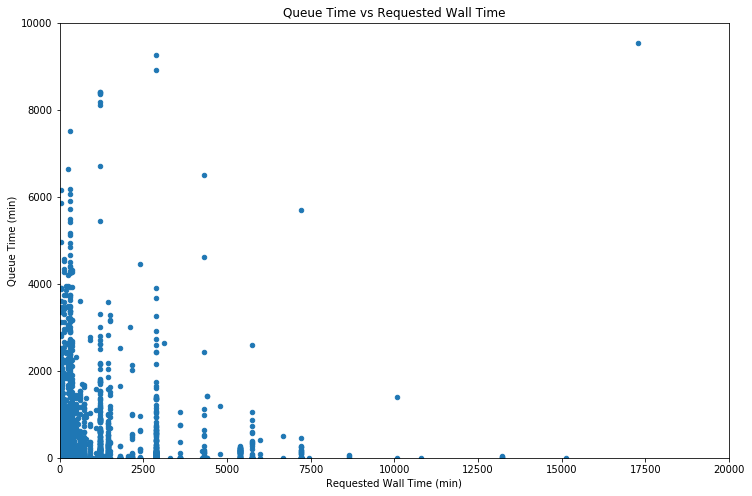

In [32]:
q1_df_rand.plot(kind='scatter', x='req_time', y='queue_time', xlim=(0,20000), ylim=(0,10000))
plt.title('Queue Time vs Requested Wall Time')
plt.xlabel('Requested Wall Time (min)')
plt.ylabel('Queue Time (min)')

Text(0,0.5,'Queue Time (min)')

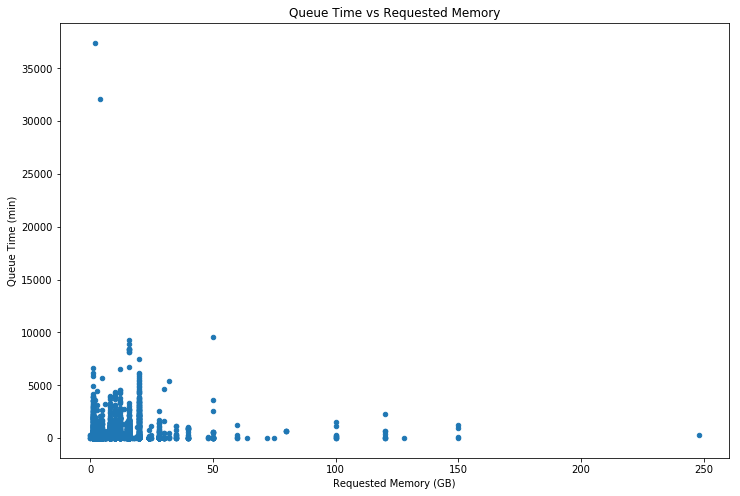

In [33]:
q1_df_rand.plot(kind='scatter', x='mem_int', y='queue_time')
plt.title('Queue Time vs Requested Memory')
plt.xlabel('Requested Memory (GB)')
plt.ylabel('Queue Time (min)')

# There doesn't appear to be much correlation between the variables

# Maybe a slight negative correlation between Queue Time and Max Wall Time

## Let's look at the distribution of Requested Wall Times

Text(0.5,0,'Requested Time (min)')

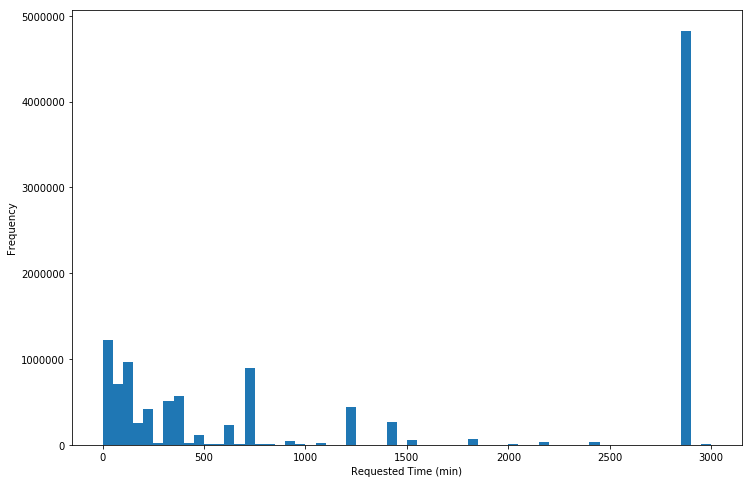

In [37]:
q1_df['req_time'].plot(kind='hist', bins = 60, range = (0,3000))
plt.xlabel('Requested Time (min)')

Text(0.5,0,'Requested Memory (GB)')

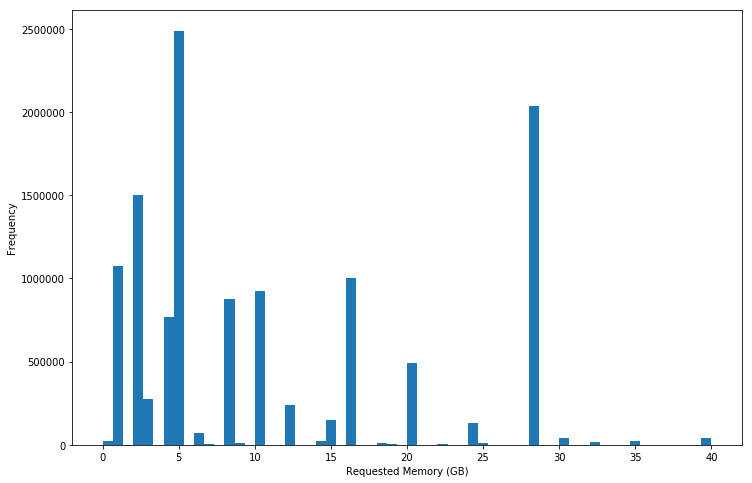

In [38]:
q1_df['mem_int'].plot(kind='hist', bins = 60, range = (0,40))
plt.xlabel('Requested Memory (GB)')

## Looking at Node and Core requests

Text(0.5,1,'Amount of People Who Request Per Node or Core')

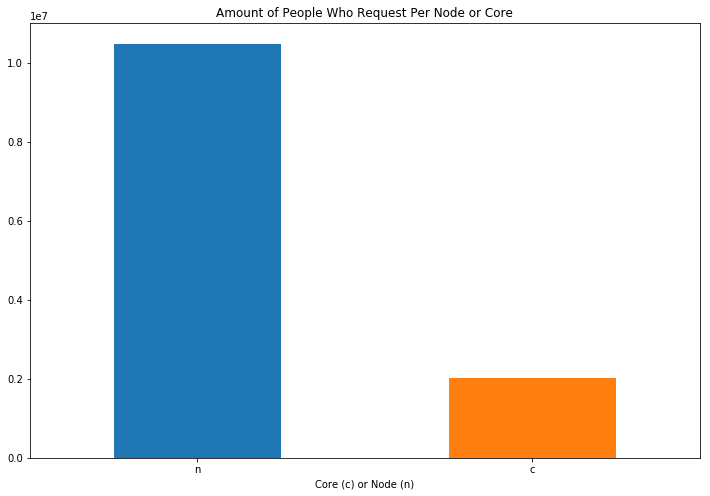

In [31]:
q1_df['core_node'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Core (c) or Node (n)')
plt.title('Amount of People Who Request Per Node or Core')

In [40]:
q1_df_core = q1_df[q1_df['core_node'] == 'c']
q1_df_node = q1_df[q1_df['core_node'] == 'n']
print('The number of users who request per core is ' + str(len(q1_df_core)))
print('The number of users who request per node is ' + str(len(q1_df_node)))

The number of users who request per core is 2012344
The number of users who request per node is 10487045


In [27]:
q1_med = q1_df_rand.groupby('core_node').median()
q1_med = q1_med.reset_index()
print(q1_med.head(30))

  core_node  queue_time  req_time  mem_int
0         c   14.316667     720.0      2.0
1         n   59.766667    2880.0      8.0


## Looking at the number who specify per core or per node for the random sample

In [53]:
q1_df_core_rand = q1_df_rand[q1_df_rand['core_node'] == 'c']
q1_df_node_rand = q1_df_rand[q1_df_rand['core_node'] == 'n']
print('The number of users who request per core is ' + str(len(q1_df_core_rand)))
print('The number of users who request per node is ' + str(len(q1_df_node_rand)))

The number of users who request per core is 785
The number of users who request per node is 4215


## Let's break the data down to a smaller subset

## We'll first look at those who request less than 5 GB

## Let's look at a scatter plot for people who request less than 5 GB 

Text(0,0.5,'Queue Time (min)')

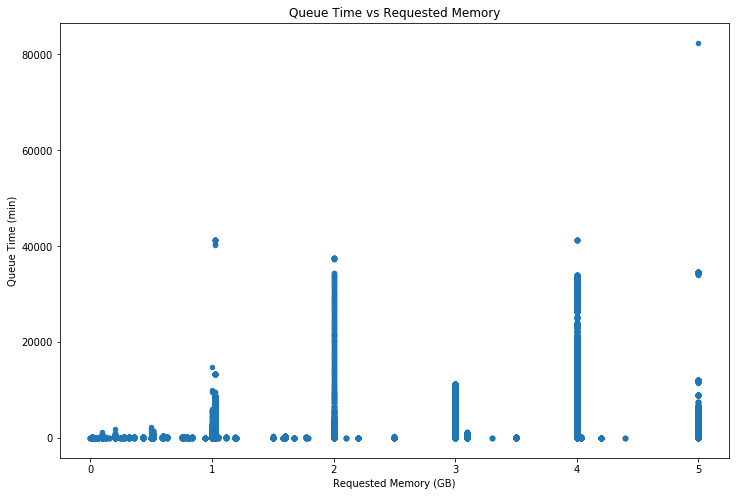

In [36]:
# Subsetting by mem_int less than or equal to 5
q1_df_less_5 = q1_df[q1_df['mem_int'] <= 5]
q1_df_less_5.plot(kind='scatter', x='mem_int', y='queue_time')
plt.title('Queue Time vs Requested Memory')
plt.xlabel('Requested Memory (GB)')
plt.ylabel('Queue Time (min)')

## We can see the columns at 1,2,3,4,5 but the other memory requests all have lower queue times

# Let's visualize with the less common requests in a different color

Text(0,0.5,'Queue Time (min)')

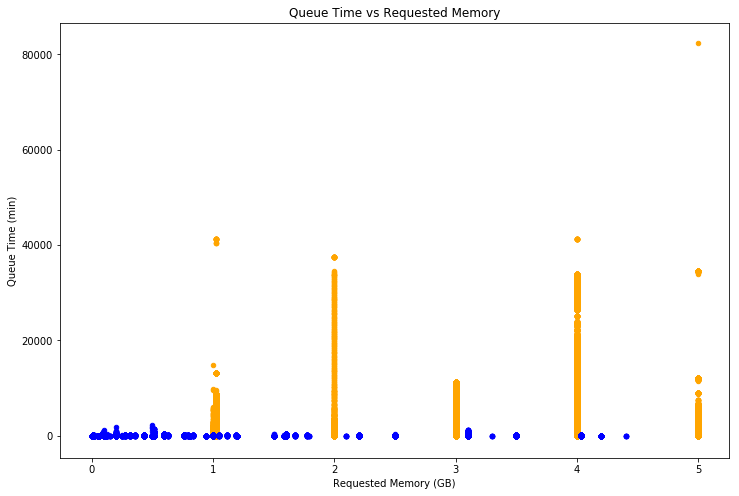

In [41]:
q1_df_less_5_common = q1_df_less_5.loc[q1_df_less_5['mem_int'].isin([1,1.024, 2,3,4,5])]
ax = q1_df_less_5_common.plot(kind='scatter', x='mem_int', y='queue_time', color='orange')

q1_df_less_5_rare = q1_df_less_5.loc[~q1_df_less_5['mem_int'].isin([1,1.024, 2,3,4,5])]
q1_df_less_5_rare.plot(kind='scatter', x='mem_int', y='queue_time', color='blue', ax=ax)

plt.title('Queue Time vs Requested Memory')
plt.xlabel('Requested Memory (GB)')
plt.ylabel('Queue Time (min)')

## All of the blue dots appear to have lower queue times than the orange, indicating that the less common requests have a shorter queue time

## Let's investigate further

In [48]:
med_q1_df_less_5_common = q1_df_less_5_common.groupby('mem_int').median()
med_q1_df_less_5_common = med_q1_df_less_5_common.reset_index()

med_q1_df_less_5_rare = q1_df_less_5_rare.groupby('mem_int').median().sort_values(by='mem_int', ascending = False)
med_q1_df_less_5_rare = med_q1_df_less_5_rare.reset_index()

print('The number of users submitting 1, 1.024, 2, 3, 4, or 5 is ' + str(len(q1_df_less_5_common.index)))
print('The number of users submitting anything else is ' + str(len(q1_df_less_5_rare.index)))

print('The median queue time for the most common requested memory is ' + str(round(q1_df_less_5_common['queue_time'].median(), 2)) + ' minutes'
     + ' vs. a median queue time of ' + str(round(q1_df_less_5_rare['queue_time'].median(), 2)) + ' minutes for rare submissions')

# print('The mean queue time for the most common requested memory is ' + str(round(q1_df_less_5_common['queue_time'].mean(), 2)) + ' minutes'
     #+ ' vs. a mean queue time of ' + str(round(q1_df_less_5_rare['queue_time'].mean(), 2)) + ' minutes for rare submissions')


The number of users submitting 1, 1.024, 2, 3, 4, or 5 is 6107247
The number of users submitting anything else is 28130
The median queue time for the most common requested memory is 59.03 minutes vs. a median queue time of 7.39 minutes for rare submissions


# We can see that the median queue times is significantly lower for the rare submissions than the common submissions

In [49]:
time_pct_group = q1_df_less_5[['req_time', 'core_node']].groupby('req_time').agg('count').sort_values(by ='core_node', ascending = False).head(30)
time_pct_group = time_pct_group.reset_index()
time_pct_group.columns = [['req_time','Count']]
time_pct_group['JobPct'] = time_pct_group['Count'] / len(q1_df_less_5.index) * 100
print(time_pct_group.head(15))

   req_time    Count     JobPct
0    2880.0  2677760  43.644588
1     720.0   787105  12.828959
2      30.0   346400   5.645945
3     240.0   232489   3.789319
4      60.0   204725   3.336796
5      15.0   164532   2.681693
6    1440.0   157529   2.567552
7   20160.0   149029   2.429011
8     120.0   136170   2.219424
9     300.0   122843   2.002208
10   5400.0   119139   1.941837
11      2.0   107457   1.751433
12    600.0    78199   1.274559
13    180.0    61987   1.010321
14      1.0    61720   1.005969


## Does this hold up for requests above 5 GB?

Text(0,0.5,'Queue Time (min)')

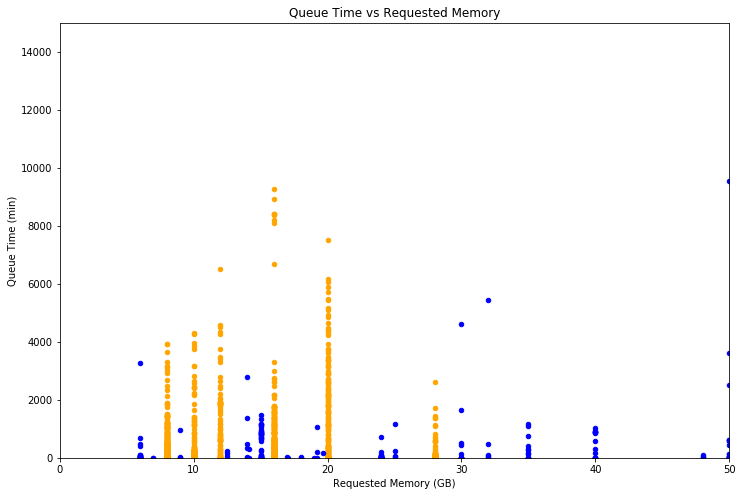

In [45]:
# Using the random subset for this one to make the plots cleaner
q1_df_greater_5 = q1_df_rand[q1_df_rand['mem_int'] > 5]
#q1_df_greater_5 = q1_df[q1_df['mem_int'] > 5]

q1_df_greater_5_common = q1_df_greater_5.loc[q1_df_greater_5['mem_int'].isin([28,10, 8,16,20, 12])]
ax = q1_df_greater_5_common.plot(kind='scatter', x='mem_int', y='queue_time', color='orange')

q1_df_greater_5_rare = q1_df_greater_5.loc[~q1_df_greater_5['mem_int'].isin([28,10, 8,16,20, 12])]
q1_df_greater_5_rare.plot(kind='scatter', x='mem_int', y='queue_time', color='blue', ax=ax)

plt.axis([0,50,0,15000])
plt.title('Queue Time vs Requested Memory')
plt.xlabel('Requested Memory (GB)')
plt.ylabel('Queue Time (min)')


## The blue dots once again appear to be lower than the orange ones

## Let's look at the medians and means again

In [50]:
med_q1_df_greater_5_common = q1_df_greater_5_common.groupby('mem_int').median()
med_q1_df_greater_5_common = med_q1_df_greater_5_common.reset_index()

med_q1_df_greater_5_rare = q1_df_greater_5_rare.groupby('mem_int').median().sort_values(by='mem_int', ascending = False)
med_q1_df_greater_5_rare = med_q1_df_greater_5_rare.reset_index()

print('The number of users submitting 1, 1.024, 2, 3, 4, or 5 is ' + str(len(q1_df_greater_5_common.index)))
print('The number of users submitting anything else is ' + str(len(q1_df_greater_5_rare.index)))

print('The median queue time for the most common requested memory is ' + str(round(q1_df_greater_5_common['queue_time'].median(), 2)) + ' minutes'
     + ' vs. a median queue time of ' + str(round(q1_df_greater_5_rare['queue_time'].median(), 2)) + ' minutes for rare submissions')

#print('The mean queue time for the most common requested memory is ' + str(round(q1_df_less_5_common['queue_time'].mean(), 2)) + ' minutes'
 #    + ' vs. a mean queue time of ' + str(round(q1_df_greater_5_rare['queue_time'].mean(), 2)) + ' minutes for rare submissions')


The number of users submitting 1, 1.024, 2, 3, 4, or 5 is 2309
The number of users submitting anything else is 277
The median queue time for the most common requested memory is 60.28 minutes vs. a median queue time of 25.08 minutes for rare submissions


## The median queue time is still significantly lower for rare submissions

## This leads us to conclude that there is a correlation between how common the requested memory is and the resulting queue time

## Shorter queue times can be achieved by submitting uncommon memory requests

## This relationship could result from the remaining memory after somebody requests a fractional amount. For example, if a 0.5 GB request gets filled a spot that has total GB available, then a 4.3 GB submission could fit in the slot while a 5 GB submission could not.

## This could also be impacted by the 1024 MB submissions if they are processed as 1.024 GB rather than 1 GB because that is a common requested memory submission.

## Let's standardize so that we look at the graphs for people who request the same amount of time. Those who request the same amount of time plotted on a line

# Time to look more into how requested wall time impacts queue time

Text(0.5,0,'Requested Memory (GB)')

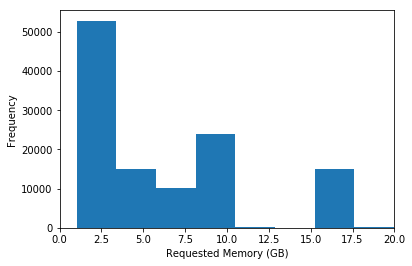

In [54]:
q1_df_node_720 = q1_df_node[q1_df_node['req_time'] == 720]
q1_df_node_720['mem_int'].plot(kind='hist', bins = 200, xlim=(0,20))
plt.xlabel('Requested Memory (GB)')

Text(0.5,0,'Requested Memory (GB)')

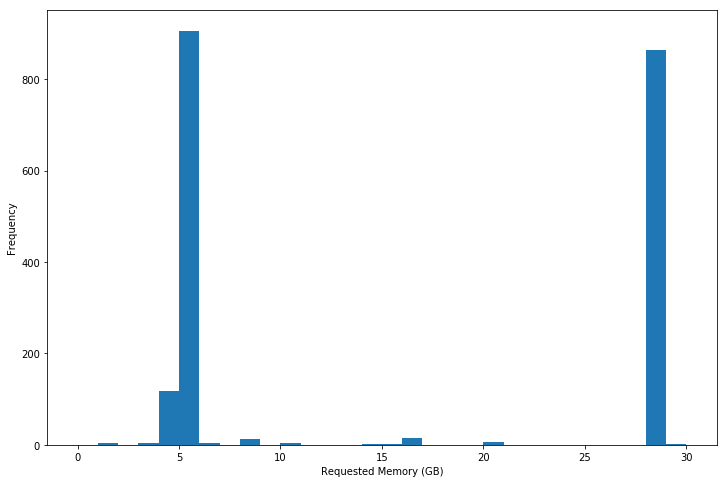

In [55]:
q1_df_node_2880 = q1_df_node_rand[q1_df_node_rand['req_time'] == 2880]
q1_df_node_2880['mem_int'].plot(kind='hist', bins = 30, range=(0,30))
plt.xlabel('Requested Memory (GB)')

Text(0.5,0,'Queue Time (min)')

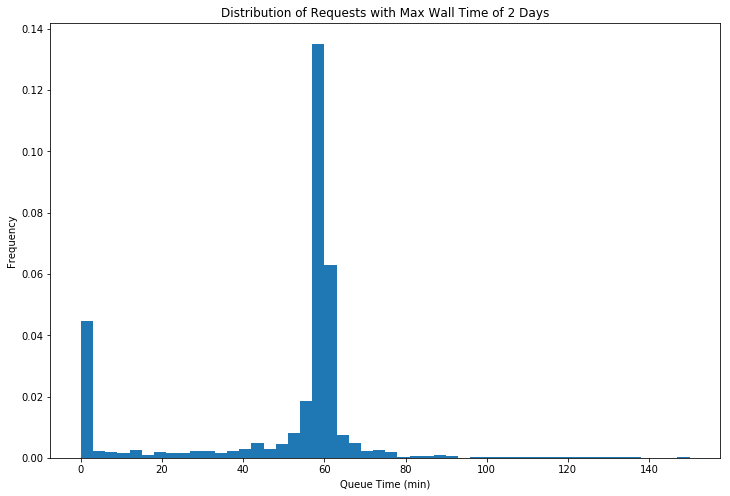

In [56]:
q1_df_node_2880['queue_time'].plot(kind='hist', bins = 50, range=(0,150), density=True)
plt.title('Distribution of Requests with Max Wall Time of 2 Days')
plt.xlabel('Queue Time (min)')

## This shows that for jobs that request 2 days (~39% of jobs) they either start right away or wait for about an hour

Text(0.5,0,'Queue Time (min)')

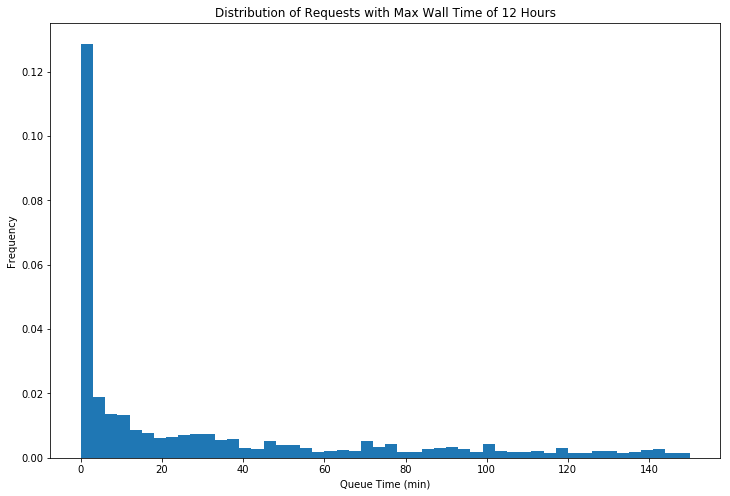

In [81]:
q1_df_node_720 = q1_df_node[q1_df_node['req_time'] == 720]
q1_df_node_720['queue_time'].plot(kind='hist', bins = 50, range=(0,150), density=True)
plt.title('Distribution of Requests with Max Wall Time of 12 Hours')
plt.xlabel('Queue Time (min)')

Text(0.5,0,'Queue Time (min)')

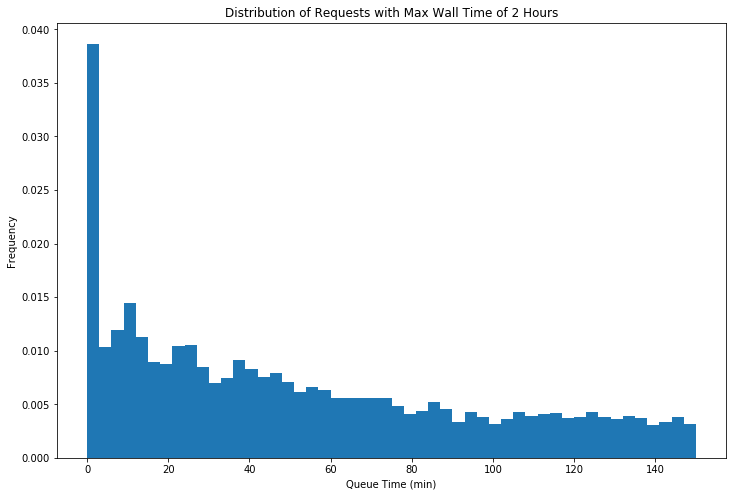

In [82]:
q1_df_node_120 = q1_df_node[q1_df_node['req_time'] == 120]
q1_df_node_120['queue_time'].plot(kind='hist', bins = 50, cumulative=False, density = True, range=(0,150))
plt.title('Distribution of Requests with Max Wall Time of 2 Hours')
plt.xlabel('Queue Time (min)')

Text(0.5,0,'Queue Time (min)')

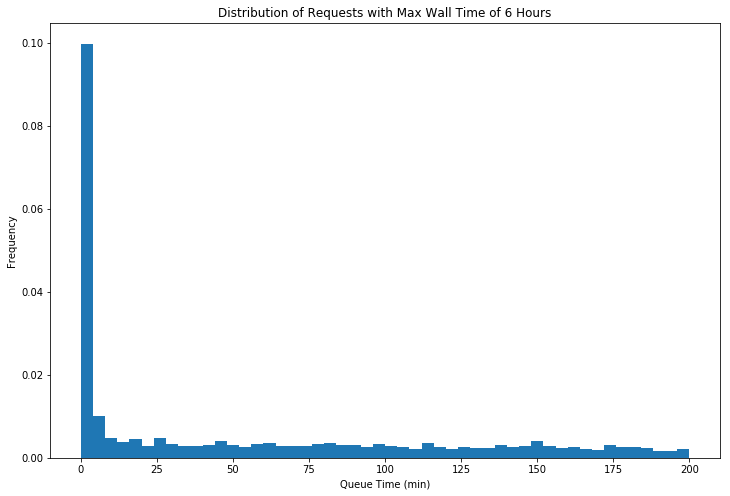

In [84]:
q1_df_node_360 = q1_df_node[q1_df_node['req_time'] == 360]
q1_df_node_360['queue_time'].plot(kind='hist', bins = 50, range=(0,200), density=True)
plt.title('Distribution of Requests with Max Wall Time of 6 Hours')
plt.xlabel('Queue Time (min)')

Text(0.5,0,'Queue Time (min)')

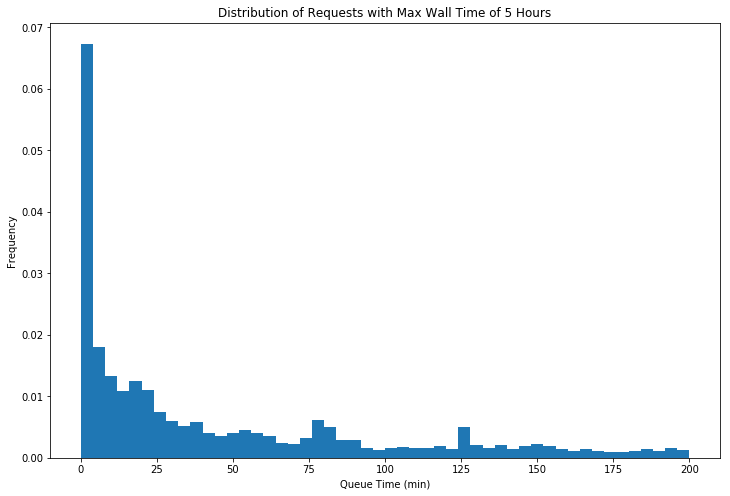

In [85]:
q1_df_node_300 = q1_df_node[q1_df_node['req_time'] == 300]
q1_df_node_300['queue_time'].plot(kind='hist', bins = 50, range=(0,200), density=True)
plt.title('Distribution of Requests with Max Wall Time of 5 Hours')
plt.xlabel('Queue Time (min)')

In [165]:
time_100 = req_time_group.iloc[:100]
#time_100_instances = req_time_group[time_100_temp]
print(time_100.tail())
time_list = time_100['req_time'].values
print(len(time_list))

   req_time JobCount    JobPct
95    157.0     1860  0.014881
96    330.0     1772  0.014177
97   1830.0     1667  0.013337
98   3300.0     1605  0.012841
99    144.0     1599  0.012793
100


In [172]:
top_100_sub = q1_df_node.loc[q1_df_node.req_time.isin(time_list)]
top_100_sub.tail()

,queue_time,req_time,mem_int,core_node,State,Account
12499303,0.183333,2880.0,4.0,n,COMPLETED,cms_samtest
12499345,0.000000,2880.0,4.0,n,COMPLETED,cms_samtest
12499349,0.150000,2880.0,4.0,n,COMPLETED,cms_samtest
12499355,0.133333,2880.0,4.0,n,COMPLETED,cms_samtest
12499388,0.000000,2880.0,4.0,n,COMPLETED,cms_samtest


In [186]:
top_100_mem_5 = top_100_sub[top_100_sub['mem_int'] == 6]
top_100_mem_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21388 entries, 39517 to 12404274
Data columns (total 6 columns):
queue_time    21388 non-null float64
req_time      21388 non-null float64
mem_int       21388 non-null float64
core_node     21388 non-null object
State         21388 non-null object
Account       21388 non-null object
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [181]:
q1_median_group = top_100_sub.groupby('req_time').median().sort_values(by = 'queue_time', ascending = False)
q1_median_group = q1_median_group.reset_index()
print(q1_median_group.head(15))

    req_time   queue_time  mem_int
0     3120.0  2516.016667    4.000
1        1.0  1290.866667    2.000
2        2.0  1282.750000    2.000
3      780.0   902.300000   16.000
4     1500.0   861.983333   16.000
5      782.0   848.700000   20.000
6      300.0   789.333333   20.000
7     2100.0   714.566667    8.000
8    20160.0   670.800000    1.024
9    10800.0   553.866667    1.024
10     480.0   544.850000    8.000
11     900.0   537.000000   10.000
12     240.0   458.350000    1.024
13     570.0   454.300000   16.000
14     160.0   450.383333    4.000


In [187]:
q1_median_group_5 = top_100_mem_5.groupby('req_time').median().sort_values(by = 'queue_time', ascending = False)
q1_median_group_5 = q1_median_group_5.reset_index()
print(q1_median_group_5.head(15))

    req_time  queue_time  mem_int
0     5400.0  676.433333      6.0
1     2100.0  513.700000      6.0
2     5760.0  263.758333      6.0
3     7200.0  131.066667      6.0
4     2160.0   86.200000      6.0
5     3600.0   47.600000      6.0
6     2880.0   34.900000      6.0
7       30.0   18.833333      6.0
8      480.0   10.866667      6.0
9     4320.0    7.100000      6.0
10   14400.0    4.650000      6.0
11      15.0    2.900000      6.0
12    1800.0    2.816667      6.0
13     840.0    2.600000      6.0
14   20160.0    2.383333      6.0


In [211]:
top_100_mem_5[top_100_mem_5['req_time'] == 5760]

,queue_time,req_time,mem_int,core_node,State,Account
548485,515.333333,5760.0,6.0,n,FAILED,rokaslab
649837,12.183333,5760.0,6.0,n,COMPLETED,rokaslab


## 3120 minutes is 52 hours, leading the pack in median queue time at 2516 minutes (~42 hours)

Text(0,0.5,'Queue Time (min)')

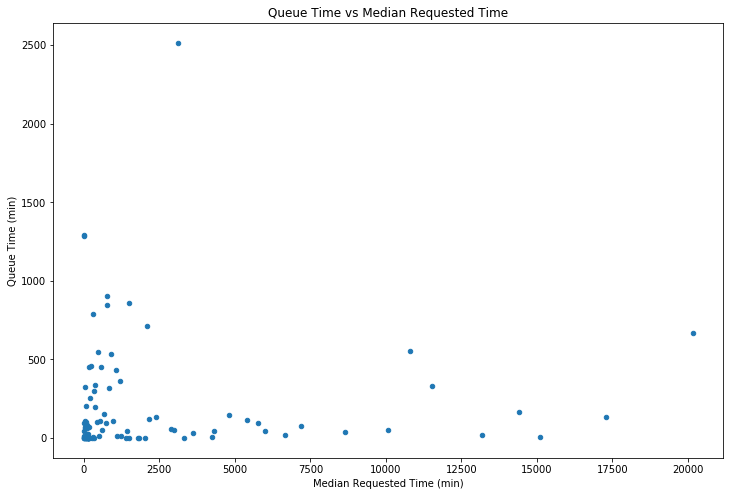

In [169]:
q1_median_group.plot(kind='scatter', x='req_time', y='queue_time')
plt.title('Queue Time vs Median Requested Time')
plt.xlabel('Median Requested Time (min)')
plt.ylabel('Queue Time (min)')

Text(0,0.5,'Queue Time (min)')

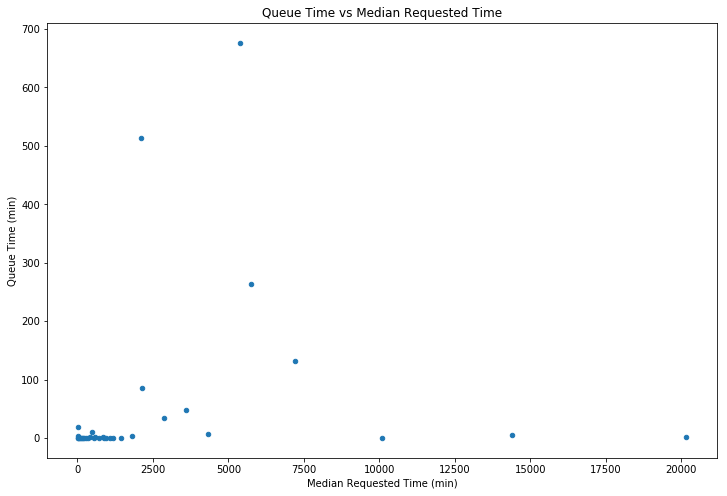

In [188]:
q1_median_group_5.plot(kind='scatter', x='req_time', y='queue_time')
plt.title('Queue Time vs Median Requested Time')
plt.xlabel('Median Requested Time (min)')
plt.ylabel('Queue Time (min)')

In [61]:
# Grouping by account name and seeing the medians of each account
q1_account_group = q1_df.groupby('Account').median()
q1_account_group = q1_account_group.reset_index()
print(q1_account_group.head(30))

             Account  queue_time  req_time  mem_int
0              accre    2.866667     120.0     0.01
1          accre_gpu    0.000000     720.0   100.00
2                aim   15.300000     240.0     3.00
3      aivas_lab_gpu    0.066667    7200.0    24.00
4        aldrich_lab    0.633333    7200.0     2.00
5       anderson_mri    0.450000      60.0    16.00
6   anderson_mri_gpu    0.016667      60.0    10.00
7           beam_lab  263.566667     480.0    16.00
8       beam_lab_gpu  435.066667     135.0     3.00
9            biomath    0.016667    2400.0    85.00
10   biostat_faculty   10.883333     600.0     2.00
11       biostat_gpu    0.516667    3000.0   100.00
12        biostat_it  384.533333     540.0    16.00
13         booth_lab    0.000000     180.0     2.00
14        bowman_lab    2.666667     480.0    20.00
15            bridge    0.333333   10080.0    20.00
16          bsci3272    0.016667     240.0    10.00
17  candelaria_group  559.166667     120.0     4.00
18         c

In [124]:
q1_df_beamlab = q1_df_node[q1_df_node['Account'] == 'lola']
q1_df_beamlab.head(10)

,queue_time,req_time,mem_int,core_node,State,Account
28740,0.016667,60.0,16.0,n,COMPLETED,lola
29301,0.016667,240.0,16.0,n,COMPLETED,lola
29507,0.033333,60.0,16.0,n,CANCELLED by 240352,lola
30667,0.016667,240.0,16.0,n,TIMEOUT,lola
33215,0.016667,240.0,16.0,n,TIMEOUT,lola
37259,0.000000,4320.0,16.0,n,COMPLETED,lola
487364,0.000000,10.0,8.0,n,CANCELLED by 645260,lola
487408,0.000000,10.0,8.0,n,CANCELLED by 645260,lola
487418,0.016667,10.0,8.0,n,CANCELLED by 645260,lola
487426,0.000000,10.0,8.0,n,CANCELLED by 645260,lola


## Examine relationship with maximum requested run time

In [112]:
# Group by Requested Time and get the averages
q1_df_avgs = q1_df_node_rand.groupby('req_time').median()
q1_df_avgs = q1_df_avgs.reset_index()
q1_df_avgs.head(15)

,req_time,queue_time,mem_int
0,1.0,1292.441667,2.000
1,2.0,1301.875000,2.000
2,3.0,96.266667,2.000
3,5.0,0.016667,1.000
4,10.0,5.875000,1.024
5,13.0,0.000000,1.000
6,15.0,35.633333,4.000
7,18.0,0.016667,1.000
8,20.0,11.300000,1.024
9,25.0,21.500000,5.000


In [108]:
q1_df_5_rand = q1_df_node_rand[q1_df_node_rand['mem_int'] == 20]
q1_df_5_rand.head(10)

,queue_time,req_time,mem_int,core_node,State,Account
3671554,5196.083333,300.0,20.0,n,COMPLETED,lola
2569191,2174.533333,300.0,20.0,n,COMPLETED,lola
1486015,382.050000,300.0,20.0,n,COMPLETED,lola
6596064,32.033333,120.0,20.0,n,COMPLETED,coxlab
3597704,0.000000,30.0,20.0,n,COMPLETED,beam_lab
2028586,2419.050000,300.0,20.0,n,COMPLETED,lola
2193369,2795.150000,300.0,20.0,n,COMPLETED,lola
2150190,1569.950000,300.0,20.0,n,COMPLETED,lola
2181644,3696.150000,300.0,20.0,n,COMPLETED,lola
12404568,151.616667,8640.0,20.0,n,COMPLETED,h_vuiis


In [127]:
q1_df_beam_rand = q1_df_node_rand[q1_df_node_rand['Account'] == 'math']
q1_df_beam_rand.head(10)

,queue_time,req_time,mem_int,core_node,State,Account
1050527,690.450000,240.0,1.024,n,COMPLETED,math
474811,147.150000,60.0,1.024,n,COMPLETED,math
346846,365.116667,30.0,1.024,n,COMPLETED,math
560520,57.550000,60.0,1.024,n,COMPLETED,math
502785,190.533333,60.0,1.024,n,COMPLETED,math
233286,954.866667,30.0,1.024,n,COMPLETED,math
872581,38.716667,240.0,1.024,n,COMPLETED,math
813959,2542.816667,240.0,1.024,n,COMPLETED,math
1047499,589.400000,240.0,1.024,n,COMPLETED,math
745599,1584.833333,240.0,1.024,n,COMPLETED,math


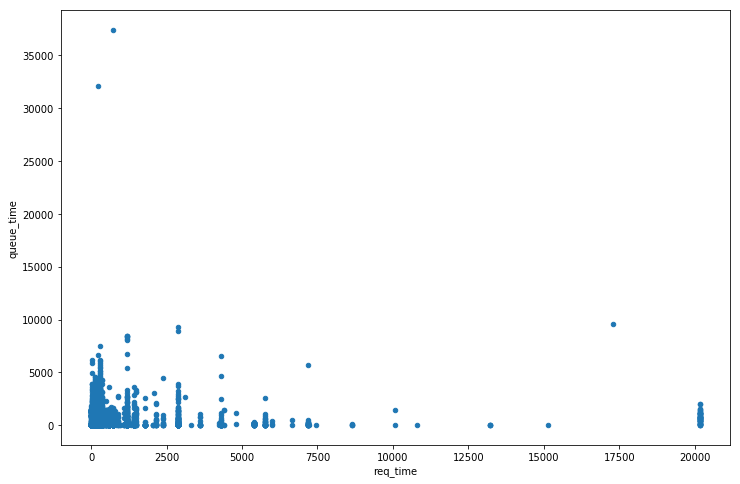

In [88]:
q1_df_rand.plot(kind='scatter',x='req_time', y='queue_time')
#plt.axis([0,7500, 0, 10000])

In [147]:
#q1_remove_outliers = q1_df_rand.loc[q1_df_rand['queue_time'] < 20000,:]
q1_remove_outliers = q1_median_group.loc[q1_median_group['queue_time'] < 1500,:]

In [148]:
q1_corr_df = q1_remove_outliers.loc[:,['req_time', 'queue_time']]

q1_corr_df.head(10)

,req_time,queue_time
1,1.0,1290.866667
2,2.0,1282.750000
3,780.0,902.300000
4,1500.0,861.983333
5,782.0,848.700000
6,300.0,789.333333
7,2100.0,714.566667
8,20160.0,670.800000
9,10800.0,553.866667
10,480.0,544.850000


In [189]:
q1_median_group_5.corr()

,req_time,queue_time,mem_int
req_time,1.000000,0.143179,NaN
queue_time,0.143179,1.000000,NaN
mem_int,NaN,NaN,NaN


# Testing Question 3 Algorithm

In [68]:
accre_select_df=accre_df.loc[:,['Submit','User','JobID','Elapsed']]
accre_select_df.head()

,Submit,User,JobID,Elapsed
0,2017-07-02 00:40:58,masispider,15806649,1 days 01:05:21
1,2017-07-02 00:40:58,masispider,15806664,0 days 23:51:47
2,2017-07-02 00:40:58,masispider,15806670,1 days 01:59:51
3,2017-07-02 00:40:58,masispider,15806671,1 days 08:02:20
4,2017-07-01 05:00:00,uscms010,15811617,0 days 00:00:10


In [70]:
accre_select_df=accre_select_df.sort_values(by=['Submit','User','Elapsed'],ascending=True)
accre_select_df.head(10)

,Submit,User,JobID,Elapsed
4,2017-07-01 05:00:00,uscms010,15811617,0 days 00:00:10
5,2017-07-01 05:00:01,autocms,15811618,0 days 00:03:18
6,2017-07-01 05:00:02,tuos,15811619,0 days 00:02:03
7,2017-07-01 05:00:22,uscms010,15811621,0 days 00:00:10
8,2017-07-01 05:01:01,autocms,15811624,0 days 00:04:47
9,2017-07-01 05:01:02,tuos,15811625,0 days 00:03:12
11,2017-07-01 05:01:22,vuiiscci,15811629,3 days 18:07:18
10,2017-07-01 05:01:22,vuiiscci,15811628,4 days 10:00:26
14,2017-07-01 05:01:23,vuiiscci,15811632,4 days 02:57:55
12,2017-07-01 05:01:23,vuiiscci,15811630,4 days 03:19:43


In [72]:
accre_5_minutes= accre_select_df[accre_select_df.Elapsed<'0 days 00:05:00']
accre_5_minutes.head(10)

,Submit,User,JobID,Elapsed
4,2017-07-01 05:00:00,uscms010,15811617,00:00:10
5,2017-07-01 05:00:01,autocms,15811618,00:03:18
6,2017-07-01 05:00:02,tuos,15811619,00:02:03
7,2017-07-01 05:00:22,uscms010,15811621,00:00:10
8,2017-07-01 05:01:01,autocms,15811624,00:04:47
9,2017-07-01 05:01:02,tuos,15811625,00:03:12
31,2017-07-01 05:01:26,vuiiscci,15811649,00:00:00
33,2017-07-01 05:01:26,vuiiscci,15811651,00:00:00
34,2017-07-01 05:01:56,uscms010,15811654,00:02:00
35,2017-07-01 05:02:02,autocms,15811655,00:02:51


In [73]:
accre_5_minutes['cum_count'] = accre_5_minutes.groupby(['User', pd.Grouper(freq='4H', key='Submit')]).cumcount()

/Users/andrewmarsee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
accre_5_minutes_500=accre_5_minutes[accre_5_minutes.cum_count>=499]


In [118]:
accre_5_minutes_500['cum_count'] = accre_5_minutes_500.loc[:,'cum_count'] + 1
accre_5_minutes_500.head()


/Users/andrewmarsee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Submit,User,JobID,Elapsed,cum_count
27713,2017-07-03 21:03:47,fletchs2,15845127,0 days,500
27714,2017-07-03 21:03:47,fletchs2,15845128,0 days,501
27715,2017-07-03 21:03:47,fletchs2,15845129,0 days,502
27716,2017-07-03 21:03:47,fletchs2,15845130,0 days,503
27717,2017-07-03 21:03:47,fletchs2,15845131,0 days,504


In [119]:
accre_5_minutes_500.groupby('User').max()


,Submit,Elapsed,cum_count
User,,,
abraha1,2018-06-27 20:01:37,00:04:59,10117
badamifs,2017-08-14 15:44:53,00:04:50,2055
bozhanng,2018-03-20 18:39:45,00:04:59,2732
brancha1,2018-01-11 23:21:50,00:04:59,1338
breediml,2018-05-28 18:06:13,00:00:00,662
brockc,2018-02-28 21:24:54,00:04:59,7972
brownbp1,2018-05-09 15:53:10,00:04:59,4154
cakira,2018-06-15 06:18:59,00:04:59,4593
chenl11,2017-09-06 05:05:44,00:01:21,535


In [130]:
accre_500_occurence = accre_5_minutes_500[accre_5_minutes_500['cum_count']==500]
accre_500_occurence.head(10)

,Submit,User,JobID,Elapsed,cum_count
27713,2017-07-03 21:03:47,fletchs2,15845127,00:00:00,500
52023,2017-07-05 20:35:17,mercalnd,15869437,00:00:00,500
58244,2017-07-06 00:12:30,mercalnd,15875658,00:01:00,500
78512,2017-07-06 17:51:51,cmsglidein,15895926,00:00:00,500
99088,2017-07-07 19:24:48,cakira,15917133_2,00:00:04,500
104047,2017-07-07 20:58:13,khancm,15919605_2585,00:02:47,500
142549,2017-07-10 04:29:57,zhangdk,15960891,00:00:00,500
160337,2017-07-10 08:05:25,zhangdk,15978679,00:00:00,500
171282,2017-07-10 16:57:08,fletchs2,15989624,00:00:00,500
179793,2017-07-10 19:56:47,zhangdk,15998135,00:00:00,500


In [80]:
prob_offender_count=accre_500_occurence[['User', 'cum_count']].groupby('User').agg('count').sort_values(by ='cum_count', ascending = False)
prob_offender_count = prob_offender_count.reset_index()
prob_offender_count.columns = [['User','short_job_count']]
#prob_offender_count['JobPct'] = state_pct_group['Count'] / len(accre_df.index) * 100
prob_offender_count.head(10)

NameError: name 'accre_500_occurence' is not defined

# Question 2. Are there any nodes that fail more than the others

In [57]:
accre_df.State.unique()


array(['COMPLETED', 'TIMEOUT', 'CANCELLED by 29607', 'FAILED',
       'CANCELLED by 454080', 'CANCELLED by 100684',
       'CANCELLED by 667840', 'CANCELLED by 660360',
       'CANCELLED by 481000', 'CANCELLED by 0', 'CANCELLED by 229215',
       'CANCELLED by 633620', 'CANCELLED by 207302',
       'CANCELLED by 124006', 'CANCELLED by 112602',
       'CANCELLED by 172079', 'CANCELLED by 199052',
       'CANCELLED by 156369', 'CANCELLED by 389801', 'NODE_FAIL',
       'CANCELLED by 123148', 'CANCELLED by 501421',
       'CANCELLED by 525961', 'CANCELLED by 352698',
       'CANCELLED by 169859', 'CANCELLED by 144605', 'CANCELLED by 85636',
       'CANCELLED by 240352', 'CANCELLED by 195638',
       'CANCELLED by 534784', 'CANCELLED by 379605',
       'CANCELLED by 308082', 'CANCELLED by 28075', 'CANCELLED by 337100',
       'CANCELLED by 497968', 'CANCELLED by 485800',
       'CANCELLED by 237813', 'CANCELLED by 504485',
       'CANCELLED by 174942', 'CANCELLED by 171742',
       'CANCEL

In [58]:
# Filtering out the jobs that run on multiple nodes
Jobs_df=accre_df.loc[accre_df['NodeList'].str[3]!='[', :]


In [59]:
#Slice the dataframe to show all failed jobs
jobs_failure = Jobs_df[(Jobs_df.State=="NODE_FAIL")]
jobs_failure.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,ReqGRES,ReqTRES,Timelimit,NodeList,JobName,queue_time,req_time,mem_cat,mem_int,core_node
22163,15839577_49,15839577,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1342,rsa_K,0.016667,7200.0,Gn,10.0,n
22166,15839577_2,15839580,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1055,rsa_K,0.000000,7200.0,Gn,10.0,n
22167,15839577_3,15839581,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1043,rsa_K,0.000000,7200.0,Gn,10.0,n
22204,15839577_40,15839618,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1342,rsa_K,0.016667,7200.0,Gn,10.0,n
22205,15839577_41,15839619,accre,production,capra_lab_csb,capra_lab,20429,sivleyrm,156369.0,2017-07-03 16:33:30,...,NaN,"cpu=1,mem=10G,node=1",5-00:00:00,vmp1342,rsa_K,0.016667,7200.0,Gn,10.0,n


In [60]:
#Drop unused columns
jobs_failed=jobs_failure[['JobID', 'ExitCode', 'State', 'NodeList']]
jobs_failed.head()

,JobID,ExitCode,State,NodeList
22163,15839577_49,0:0,NODE_FAIL,vmp1342
22166,15839577_2,0:0,NODE_FAIL,vmp1055
22167,15839577_3,0:0,NODE_FAIL,vmp1043
22204,15839577_40,0:0,NODE_FAIL,vmp1342
22205,15839577_41,0:0,NODE_FAIL,vmp1342


In [61]:
#Count how many times each node has failed
pd.DataFrame(jobs_failed.NodeList.value_counts());

In [62]:
#Count how many times every node has been used overall
pd.DataFrame(Jobs_df.NodeList.value_counts());

In [63]:
failed = {}
for key, value in jobs_failed[jobs_failed.State.isin(['NODE_FAIL'])].groupby('NodeList').size().iteritems():
    failed.update({key: value})

In [64]:
failed_df = pd.DataFrame.from_dict(failed, orient='index', columns=["failures"])
failed_df.reset_index(level=0, inplace=True)
failed_df.head()

,index,failures
0,gpu0001,2
1,gpu0002,1
2,gpu0003,1
3,gpu0004,2
4,gpu0005,2


In [65]:
total = {}
for key, value in Jobs_df.groupby('NodeList').size().iteritems():
    total.update({key: value})

In [66]:
total_df = pd.DataFrame.from_dict(total, orient='index', columns=["uses"])
total_df.reset_index(level=0, inplace=True)
total_df.head()

,index,uses
0,None assigned,3470227
1,amn0008,130
2,amn0009,109
3,gpu0001,5891
4,gpu0002,4072


In [68]:
overall_df = pd.merge(total_df, failed_df, how='outer')
overall_df.head()

,index,uses,failures
0,None assigned,3470227,NaN
1,amn0008,130,NaN
2,amn0009,109,NaN
3,gpu0001,5891,2.0
4,gpu0002,4072,1.0


In [69]:
overall_df['Pct_Fail'] = ""
overall_df.head()

,index,uses,failures,Pct_Fail
0,None assigned,3470227,NaN,
1,amn0008,130,NaN,
2,amn0009,109,NaN,
3,gpu0001,5891,2.0,
4,gpu0002,4072,1.0,


In [70]:
overall_df['failures'].fillna(0, inplace=True)


In [71]:
overall_df['Pct_Fail']=overall_df.failures/overall_df.uses*100
overall_df.head()

,index,uses,failures,Pct_Fail
0,None assigned,3470227,0.0,0.000000
1,amn0008,130,0.0,0.000000
2,amn0009,109,0.0,0.000000
3,gpu0001,5891,2.0,0.033950
4,gpu0002,4072,1.0,0.024558


In [72]:
overall_df.sort_values("Pct_Fail", ascending = False, inplace = True)
overall_df.head()

,index,uses,failures,Pct_Fail
42,vm-qa-node004,6,1.0,16.666667
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679


In [73]:
overall_full_subset = overall_df[overall_df['Pct_Fail']>0]
overall_full_subset = overall_full_subset[overall_full_subset['Pct_Fail']<1]
overall_full_subset.head()

,index,uses,failures,Pct_Fail
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679
649,vmp696,1118,7.0,0.626118


In [74]:
overall_final = overall_full_subset.head(25)
overall_final.columns = ['Node', 'uses', 'failures', 'Pct_Fail']
overall_final

,Node,uses,failures,Pct_Fail
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679
649,vmp696,1118,7.0,0.626118
24,gpu0022,505,3.0,0.594059
648,vmp695,1097,5.0,0.455789
12,gpu0010,1097,5.0,0.455789
631,vmp597,1099,5.0,0.454959
651,vmp698,1147,5.0,0.435920


In [75]:
overall_full_subset.tail()

,index,uses,failures,Pct_Fail
50,vmp1010,36912,1.0,0.002709
46,vmp1003,38681,1.0,0.002585
257,vmp1298,47568,1.0,0.002102
44,vmp1001,66221,1.0,0.001510
368,vmp1409,92419,1.0,0.001082


In [76]:
overall_full_subset.Pct_Fail.describe()


count    592.000000
mean       0.044829
std        0.082634
min        0.001082
25%        0.010810
50%        0.026098
75%        0.049695
max        0.785855
Name: Pct_Fail, dtype: float64

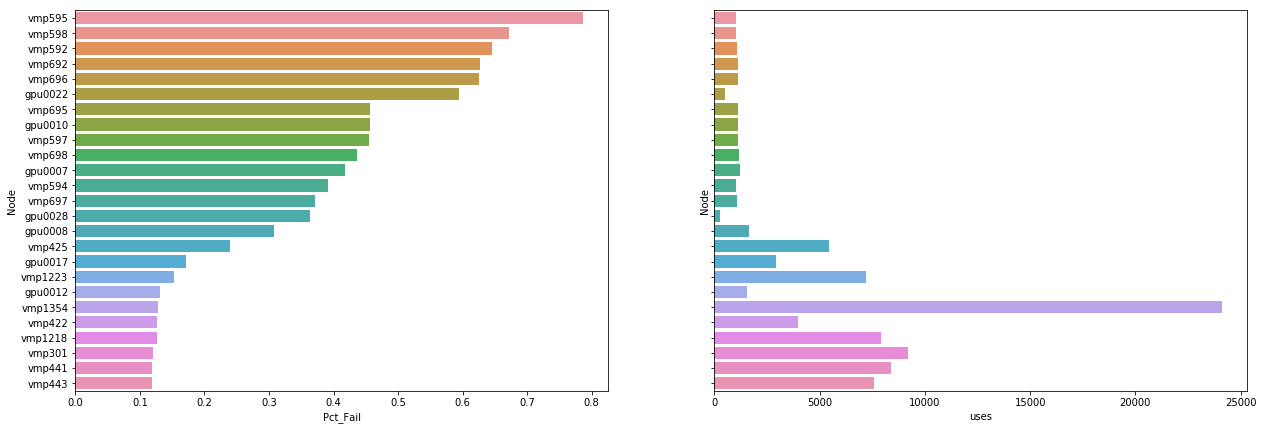

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (21,7), sharey=True)
sns.barplot(overall_final.Pct_Fail, overall_final.Node, orient='h', ax=ax1);

sns.barplot(overall_final.uses, overall_final.Node, orient='h', ax=ax2);
plt.show()


# We can see that vmp595 has the highest failure rate at 0.7896%. The highest number of failures is vmp1354, but it is used far more often

# Additional Exploration

## Accounts that submit the most jobs

In [151]:
acct_pct_group=accre_df[['Account', 'JobIDRaw']].groupby('Account').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
acct_pct_group = acct_pct_group.reset_index()
acct_pct_group.columns = [['AccountName','Count']]
acct_pct_group['JobPct'] = acct_pct_group['Count'] / len(accre_df.index) * 100
print(acct_pct_group.head(15))

          AccountName    Count     JobPct
0                 cms  3539682  28.318840
1            beam_lab  1447136  11.577654
2         cms_lowprio   928918   7.431707
3        p_csb_meiler   762188   6.097802
4          cms_stage2   663017   5.304395
5            mip_eecs   575854   4.607057
6   h_biostat_student   446568   3.572719
7                lola   442628   3.541197
8            p_meiler   427429   3.419599
9                math   371118   2.969089
10         cms_stage3   302112   2.417014
11           rokaslab   295962   2.367812
12        cms_samtest   271589   2.172818
13                cgg   226560   1.812569
14            stassun   180297   1.442447


## The most common state for the jobs run

In [152]:
state_pct_group=accre_df[['State', 'JobIDRaw']].groupby('State').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
state_pct_group = state_pct_group.reset_index()
state_pct_group.columns = [['State','Count']]
state_pct_group['JobPct'] = state_pct_group['Count'] / len(accre_df.index) * 100
print(state_pct_group.head(15))

                  State    Count     JobPct
0             COMPLETED  7150200  57.204396
1    CANCELLED by 29607  3354734  26.839184
2                FAILED   902907   7.223609
3    CANCELLED by 29605   355327   2.842755
4               TIMEOUT   160402   1.283279
5   CANCELLED by 112888   105801   0.846449
6   CANCELLED by 233674    66809   0.534498
7   CANCELLED by 207302    44886   0.359106
8        CANCELLED by 0    29569   0.236564
9   CANCELLED by 551122    24607   0.196866
10   CANCELLED by 53988    19998   0.159992
11  CANCELLED by 233240    17531   0.140255
12  CANCELLED by 237602    17013   0.136111
13  CANCELLED by 342713    16950   0.135607
14  CANCELLED by 501421    16363   0.130910


## Finding the jobs with state: 'Cancelled by 29607'

In [153]:
g29607 = accre_df.loc[accre_df['State'] == 'CANCELLED by 29607']
g29607.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,ReqGRES,ReqTRES,Timelimit,NodeList,JobName,queue_time,req_time,mem_cat,mem_int,core_node
333,15811976,15811976,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:08:13,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1084,bl_0a8dbb748125,0.216667,2880.0,Mn,5.0,n
345,15812001,15812001,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:10:58,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1125,bl_ce6cb456d537,0.466667,2880.0,Mn,5.0,n
464,15812208,15812208,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:00,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1061,bl_6912aec9c558,0.466667,2880.0,Mn,5.0,n
467,15812211,15812211,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1064,bl_36a387505a7a,0.383333,2880.0,Mn,5.0,n
468,15812212,15812212,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1010,bl_b2a66b1f253e,0.383333,2880.0,Mn,5.0,n
469,15812213,15812213,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1073,bl_28b10eb384f1,0.383333,2880.0,Mn,5.0,n
470,15812214,15812214,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:05,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1007,bl_1e0513c2f2c7,0.383333,2880.0,Mn,5.0,n
471,15812215,15812215,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:21,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp1052,bl_38f20779d123,0.116667,2880.0,Mn,5.0,n
472,15812216,15812216,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:21,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp204,bl_31d63b0fbd16,0.116667,2880.0,Mn,5.0,n
473,15812217,15812217,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-07-01 05:50:21,...,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp201,bl_4a4e62d19656,0.116667,2880.0,Mn,5.0,n


## Seeing who user 29607 is

In [154]:
cancel_count=g29607[['User', 'JobIDRaw']].groupby('User').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
cancel_count = cancel_count.reset_index()
cancel_count.columns = [['Group Cancel by 29607','Count']]
cancel_count['JobPct'] = cancel_count['Count'] / len(g29607) * 100
print(cancel_count.head(15))

  Group Cancel by 29607    Count JobPct
0            cmsglidein  3354734    100
